In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import tqdm
import re

In [2]:
def plot_smoothed_scores(score_lists, 
                         window_size, 
                         model_names, 
                         colors=None, 
                         line_styles=None, 
                         line_width=1.0, 
                         landscape=False, 
                         file_name='image'):
#     def round_to_nearest_base(number):
#         base = 10 ** (len(str(number)) - 1)
#         return round(number / base) * base
    def smooth_data(data):
        smoothed_data = []
        for i in range(len(data)):
            start = max(0, i - window_size)
            end = i + 1
            window_data = data[start:end]
            smoothed_data_point = sum(window_data) / len(window_data)
            smoothed_data.append(smoothed_data_point)
        return smoothed_data #[5:]

    num_models = len(score_lists)
    
    # Define default colors if not provided
    if colors is None:
        colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Define default line styles if not provided
    if line_styles is None:
        line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

    # Determine the figure size based on landscape mode
    if landscape:
        figsize = (12, 6)
    else:
        figsize = (8, 6)

    # Create a new figure with specific settings for a research paper
    plt.figure(figsize=figsize)
    ax = plt.gca()

    for i in range(num_models):
        # Smooth the data for each model
        if model_names[i] in ['OnlineAutoML','OAML']:
            smoothed_scores = smooth_data(score_lists[i])
        else:
            smoothed_scores = smooth_data(score_lists[i][5:])
        
        #smoothed_scores = score_lists[i]

        # Plot smoothed metric scores with different colors, line styles, and line widths
        #plt.plot(range(1, len(smoothed_scores) + 1), smoothed_scores, label=f"{model_names[i]}({score_lists[i][-1]:.2f})", color=colors[i], linestyle=line_styles[i], linewidth=line_width)
        plt.plot(range(1, len(smoothed_scores) + 1), smoothed_scores, label=f"{model_names[i]}", color=colors[i], linestyle=line_styles[i], linewidth=line_width)

    # Customize the axis labels and title
    if landscape:
        plt.xlabel('#Instances (in thousands)', fontsize=12)
        plt.ylabel('Prequential Accuracy (%)', fontsize=12)
        #plt.title(dataset_name.upper(), fontsize=14,y=1.06)
    else:
        plt.xlabel('#Instances (in thousands)', fontsize=12)
        plt.ylabel('Prequential Accuracy (%)', fontsize=12)
        #plt.title(dataset_name.upper(), fontsize=14,y=1.06)

    # Customize the tick labels and grid
    plt.xticks(fontsize=10)  # Set x-axis ticks in thousands
    plt.yticks(fontsize=10)  # Set y-axis ticks in steps of 0.05
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    #plt.legend(fontsize=14, ncol=7, loc='upper center', bbox_to_anchor=(0.5, 1.5))
    plt.legend(fontsize=10)

    # Adjust the layout and save the figure as a high-resolution image
    plt.tight_layout()
    
    if landscape:
        #pass
        plt.savefig(f'charts/{file_name}.png', dpi=300)  # Save as a high-resolution image in landscape mode
    else:
        pass
        plt.savefig(f'charts/{file_name}.png', dpi=300)  # Save as a high-resolution image in normal mode
    
    plt.show()

In [3]:
records = os.listdir("saved_results_json/")

In [4]:
records = [_ for _ in records if _.split(".")[-1]=='json']

In [5]:
records = sorted(records)

In [6]:
records

['ARFC_adult.json',
 'ARFC_electricity.json',
 'ARFC_forest_cover.json',
 'ARFC_hyperplane_high_gradual_drift.json',
 'ARFC_insects.json',
 'ARFC_movingRBF.json',
 'ARFC_moving_squares.json',
 'ARFC_new_airlines.json',
 'ARFC_sea_high_abrupt_drift.json',
 'ARFC_sea_high_mixed_drift.json',
 'ARFC_shuttle.json',
 'ARFC_synth_RandomRBFDrift.json',
 'ARFC_synth_agrawal.json',
 'ARFC_vehicle_sensIT.json',
 'AutoClass_adult.json',
 'AutoClass_electricity.json',
 'AutoClass_forest_cover.json',
 'AutoClass_hyperplane_high_gradual_drift.json',
 'AutoClass_insects.json',
 'AutoClass_movingRBF.json',
 'AutoClass_moving_squares.json',
 'AutoClass_new_airlines.json',
 'AutoClass_sea_high_abrupt_drift.json',
 'AutoClass_sea_high_mixed_drift.json',
 'AutoClass_shuttle.json',
 'AutoClass_synth_RandomRBFDrift.json',
 'AutoClass_synth_agrawal.json',
 'AutoClass_vehicle_sensIT.json',
 'AutoStreamML_Best_adult.json',
 'AutoStreamML_Best_electricity.json',
 'AutoStreamML_Best_forest_cover.json',
 'AutoStre

In [86]:
dataset_name_list = ['adult',
                     'electricity',
                     'forest_cover',
                     'insects',
                     'new_airlines',
                     'shuttle',
                     'vehicle_sensIT',
                     'hyperplane_high_gradual_drift',
                     'movingRBF',
                     'moving_squares',
                     'sea_high_abrupt_drift',
                     'sea_high_mixed_drift',
                     'synth_RandomRBFDrift',
                     'synth_agrawal']

In [7]:
def extract_name_from_file_names(file_name,model_name):
    
    pattern = f'{model_name}_(.*?).json'

    match = re.search(pattern, file_name)
    
    if match:
        return  match.group(1)

    return None

In [8]:
models = ['AutoStreamML_Final','AutoStreamML_Best','AutoClass','OnlineAutoML','EvoAutoML','ARFC','SRPC','HATC']

In [3]:
# Chnage Dataset anme on by one from dataset list given above
dataset_name = 'synth_agrawal'
dataset_name

'synth_agrawal'

In [10]:
model_names = []
p_scores_list = []
w_scores_list = []
times_list = []
memeories_list = []
for model_name in tqdm.tqdm(models):
    for record in records:
            dn = extract_name_from_file_names(record,model_name)
            #print(dn)
            if dataset_name==dn:
                with open(f'saved_results_json/{record}', 'r') as json_file:
                    record_dict = json.load(json_file)
                model_names.append(record_dict['model'])
                p_scores_list.append([i*100 for i in record_dict['prequential_scores']])
                w_scores_list.append([i*100 for i in record_dict['windows_scores']])
                times_list.append(record_dict['time'])
                #memeories_list.append([0 if i<0 else i/1024/1024 for i in record_dict['memeory']])
                memeories_list.append([i for i in record_dict['memory']])

100%|██████████| 8/8 [00:00<00:00,  9.97it/s]


In [11]:
model_names

['AutoStreamML_Final',
 'AutoStreamML_Best',
 'AutoClass',
 'OnlineAutoML',
 'EvoAutoML',
 'ARFC',
 'SRPC',
 'HATC']

In [12]:
model_names = ['ASML_E','ASML_B','AutoClass','OAML','EAML','ARFC','SRPC','HATC']

In [ ]:
plot_smoothed_scores(score_lists=w_scores_list,
                     window_size=1, # chnage window size its smooth the chart
                     model_names=model_names,
                     line_width=1.5,
                     landscape=True,
                     file_name=f'asml_comp_baseline_{dataset_name}') # name of the model to save in folder

# Memory and Time Usage Plot

In [10]:
file_name = "asml_memory_comp_plot"

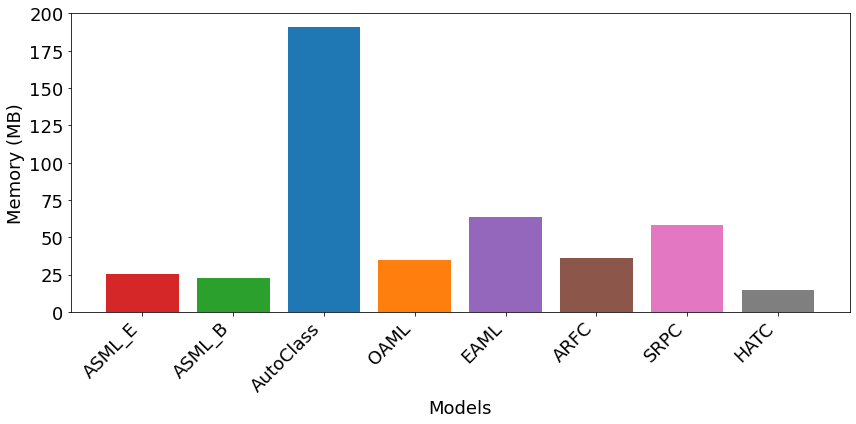

In [11]:
import matplotlib.pyplot as plt

# Data
models = ['ASML_E','ASML_B','AutoClass','OAML','EAML','ARFC','SRPC','HATC']
#time_seconds = [1720.47, 905.81, 3317.28, 3432.90, 2502.05, 426.60,1310.61,292.86]
memory_mb = [25.62, 22.80, 190.88, 34.95, 63.33, 35.91, 58.14, 14.96]

# Color sequence
colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Set the figsize
plt.figure(figsize=(12, 6))

# Plotting the bar chart with specified colors
#plt.bar(models, time_seconds, color=colors)
plt.bar(models, memory_mb, color=colors)
plt.xlabel('Models', fontsize=18)
#plt.ylabel('Time (Seconds)', fontsize=18)
plt.ylabel('Memory (MB)', fontsize=18)
#plt.title('Execution Time for Different Models')
plt.xticks(rotation=45, ha='right', fontsize=18)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=18)
plt.tight_layout()  # Ensure labels are not cut off


plt.savefig(f'charts/{file_name}.png',dpi=300,bbox_inches='tight')
# Show the plot
plt.show()